## Time series forecasting using LSTMs

### Prediction of temperature in New Delhi with time series forecasting using RNN method.

### Installing Dependencies

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Loading, analysing and pre-processing data

In [41]:
data = pd.read_csv("C:/Users/anmol/OneDrive/Desktop/testset.csv")

In [42]:
data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [43]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [44]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data.set_index('datetime_utc', inplace = True)
data = data.resample('D').mean()

In [45]:
df = data[[' _tempm',' _hum']]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 2 columns):
 _tempm    7336 non-null float64
 _hum      7336 non-null float64
dtypes: float64(2)
memory usage: 175.3 KB


#### Replacing NA values

In [47]:
tmean = df[' _tempm'].mean()
df[' _tempm'].fillna(tmean,inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [48]:
hmean = df[' _hum'].mean()
df[' _hum'].fillna(hmean,inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 2 columns):
 _tempm    7480 non-null float64
 _hum      7480 non-null float64
dtypes: float64(2)
memory usage: 175.3 KB


In [50]:
df.head()

,_tempm,_hum
datetime_utc,,
1996-11-01,22.333333,52.916667
1996-11-02,22.916667,48.625000
1996-11-03,21.791667,55.958333
1996-11-04,22.722222,48.055556
1996-11-05,27.800000,29.400000


#### Plotting temp v/s Humidity Curve

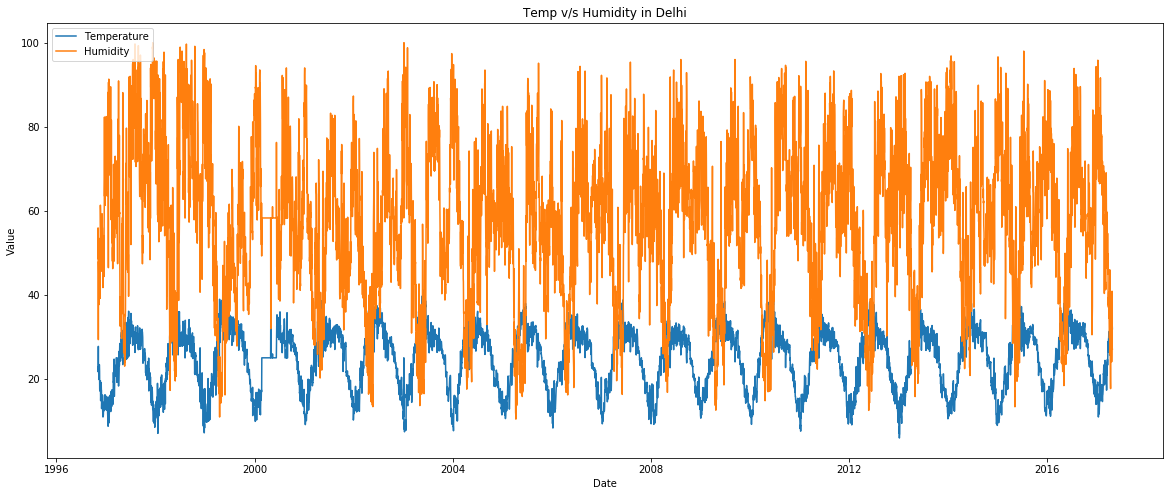

In [51]:
plt.figure(figsize=(20,8))
plt.plot(df[' _tempm'], label ="Temperature")
plt.plot(df[' _hum'], label ="Humidity")
plt.title('Temp v/s Humidity in Delhi')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.show()

#### Temperature Curve

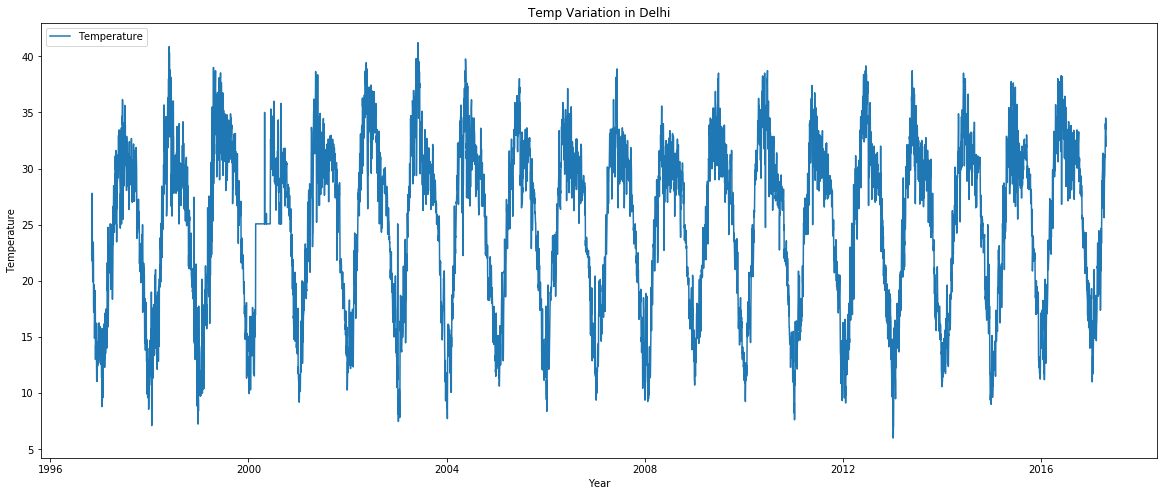

In [52]:
plt.figure(figsize=(20,8))
plt.plot(df[' _tempm'], label ="Temperature")
plt.title('Temp Variation in Delhi')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc="upper left")
plt.show()

#### Selecting timestep and splitting data into train and test split

In [53]:
df1 = df[[' _tempm']]

In [54]:
df1.head(10)

,_tempm
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
1996-11-06,21.937500
1996-11-07,21.750000
1996-11-08,21.260870
1996-11-09,19.909091


In [55]:
scaler = MinMaxScaler(feature_range = (-1,1))
sc = scaler.fit_transform(df1)

In [56]:
sc

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [57]:
timestep = 40
X = []
Y = []
for i in range(len(sc) - timestep):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])

In [58]:
X = np.asanyarray(X)
Y = np.asanyarray(Y)
no_of_ex = 7200
X_train = X[:no_of_ex,:,:]
X_test = X[no_of_ex:,:,:]
Y_train = Y[:no_of_ex]
Y_test = Y[no_of_ex:]

In [59]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7200, 40, 1)
(7200, 1)
(240, 40, 1)
(240, 1)


## LSTM Model

In [22]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [23]:
model = Sequential()
model.add(Conv1D(filters = 256, kernel_size = 2 , activation = "relu", input_shape = (40,1)))
model.add(Conv1D(filters = 128, kernel_size = 2 , activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
#prepares a vector for a fully conected layer
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(128, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train,Y_train,epochs = 300, verbose = 0)

In [60]:
from sklearn.metrics import mean_squared_error

### Prediction

In [61]:
preds_cnn1 = model.predict(X_test)
preds_cnn1 = scaler.inverse_transform(preds_cnn1)


Y_test=np.asanyarray(Y_test)  
Y_test=Y_test.reshape(-1,1) 
Y_test = scaler.inverse_transform(Y_test)


Y_train=np.asanyarray(Y_train)  
Y_train=Y_train.reshape(-1,1) 
Y_train = scaler.inverse_transform(Y_train)

mean_squared_error(Y_test,preds_cnn1)

3.445996657277099

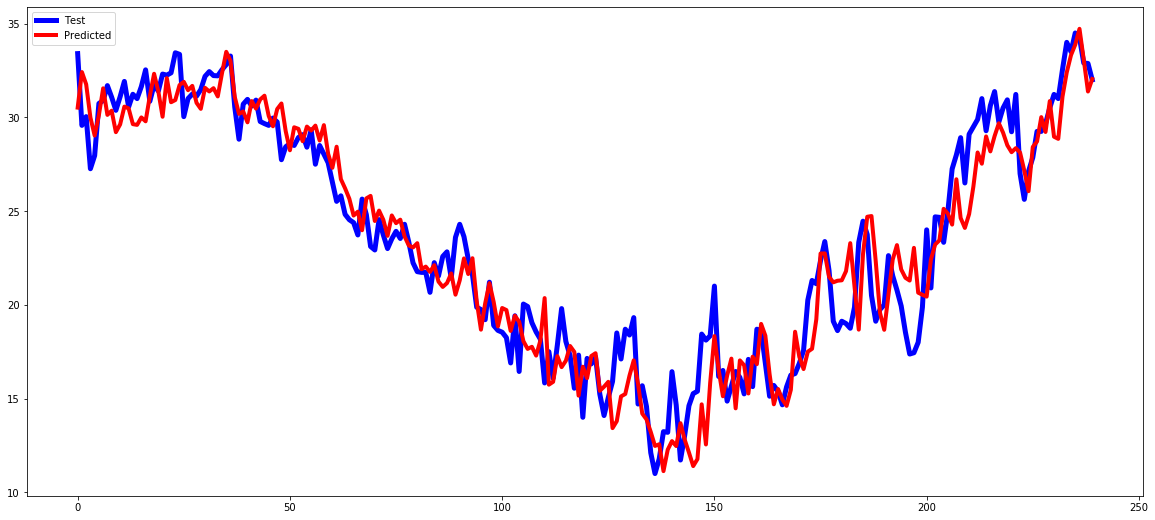

In [62]:
plt.figure(figsize=(20,9))
plt.plot(Y_test , 'blue', linewidth=5)
plt.plot(preds_cnn1,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

### Forecasting on Test Set

In [66]:
def insert_end(Xi, new_example):
    for i in range(timestep-1):
        Xi[:,i,:]= Xi[:,i+1,:]
    Xi[:,timestep-1,:] = new_example
    return Xi

In [67]:
first = 0
future = 300
forecast_cnn = []
Xi = X_test[first:first+1,:,:]
for i in range(future):
    out = model.predict(Xi, batch_size=1)
    forecast_cnn.append(out[0,0])
    Xi = insert_end(Xi,out[0,0])

In [69]:
forecasted_output_cnn=np.asanyarray(forecast_cnn)   
forecasted_output_cnn=forecasted_output_cnn.reshape(-1,1) 
forecasted_output_cnn = scaler.inverse_transform(forecasted_output_cnn)

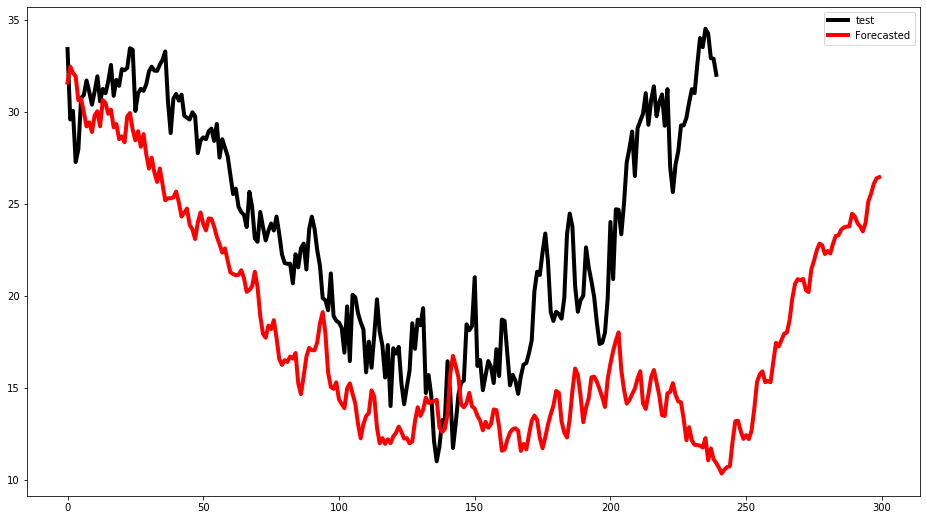

In [72]:
plt.figure(figsize=(16,9))
plt.plot(Y_test , 'black', linewidth=4)
plt.plot(forecasted_output_cnn,'r' , linewidth=4)
plt.legend(('test','Forecasted'))
plt.show()